<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Anjesh/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [13]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [14]:
crypto = 'ADA'
currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [15]:
data.index = pd.to_datetime(data.index)

In [16]:
#Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [17]:
pred_days = 30 # no. of days you're considering for the prediction

In [18]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [20]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
42/42 [==============================] - 6s 45ms/step - loss: 0.0094
Epoch 2/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0030
Epoch 3/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0030
Epoch 4/30
42/42 [==============================] - 2s 45ms/step - loss: 0.0018
Epoch 5/30
42/42 [==============================] - 2s 47ms/step - loss: 0.0019
Epoch 6/30
42/42 [==============================] - 2s 45ms/step - loss: 0.0020
Epoch 7/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 8/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0018
Epoch 9/30
42/42 [==============================] - 2s 45ms/step - loss: 0.0018
Epoch 10/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0017
Epoch 11/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 12/30
42/42 [==============================] - 2s 45ms/step - loss: 0.0014
Epoch 13/30
42/42 [==================

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
42/42 [==============================] - 6s 43ms/step - loss: 0.0061
Epoch 2/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0024
Epoch 3/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 4/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0022
Epoch 5/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0020
Epoch 6/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0020
Epoch 7/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 8/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0018
Epoch 9/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 10/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0016
Epoch 11/30
42/42 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 12/30
42/42 [==============================] - 2s 44ms/step - loss: 0.0013
Epoch 13/30
42/42 [==================

In [22]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [23]:
test_data.index = pd.to_datetime(test_data.index)


In [24]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,0.184246,0.172022,0.181382,0.175350,1122218004,0.175350
2021-01-02,0.184253,0.169233,0.175359,0.177423,1408849504,0.177423
2021-01-03,0.208679,0.173376,0.177382,0.204995,2303857909,0.204995
2021-01-04,0.239661,0.194450,0.205236,0.224762,3260699086,0.224762
2021-01-05,0.264886,0.208454,0.224817,0.258314,4097207384,0.258314
...,...,...,...,...,...,...
2021-06-24,1.392683,1.245304,1.359522,1.256478,4343177013,1.256478
2021-06-25,1.291396,1.198573,1.254301,1.250440,3241467640,1.250440
2021-06-26,1.348168,1.243678,1.251827,1.335202,2371576551,1.335202


In [25]:
actual_prices = test_data['Close']

In [26]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.17535   , 0.177423  , 0.20499501, 0.22476199, 0.25831401,
       0.331898  , 0.29998001, 0.30559701, 0.332973  , 0.30489501,
       0.275466  , 0.28700301, 0.313609  , 0.31039599, 0.30252999,
       0.35244399, 0.379852  , 0.37142801, 0.36913699, 0.37539399,
       0.31020901, 0.34957701, 0.34564301, 0.353881  , 0.34388599,
       0.34423399, 0.31308001, 0.333303  , 0.348131  , 0.36261901,
       0.34489799, 0.402033  , 0.426247  , 0.44139999, 0.44105101,
       0.53787398, 0.627886  , 0.66323799, 0.68251097, 0.70351601,
       0.930318  , 0.92774099, 0.925587  , 0.90571898, 0.84841901,
       0.86101198, 0.870951  , 0.89091998, 0.91411901, 0.92764902,
       1.12295794, 1.10052001, 1.09915102, 0.95470899, 1.05165696,
       1.07911599, 1.24110496, 1.32485998, 1.30805898, 1.29238796,
       1.225582  , 1.21659303, 1.11486804, 1.16852295, 1.13101196,
       1.13336694, 1.11805296, 1.19516098, 1.13500297, 1.12478995,
       1.03914404, 1.10331404, 1.05915403, 1.03353906, 1.24295

In [27]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [28]:
total_dataset.index = pd.to_datetime(total_dataset.index)


In [29]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [30]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

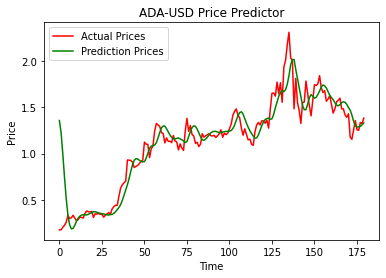

In [32]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()